<a href="https://colab.research.google.com/github/noelmtv/Colab-Learning/blob/main/Black_ScholesTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trading using the Black-Scholes Model


#### Solving the Black-Scholes Equation Yields
$$C = S_t \Phi(d_1) - Ke^{-rt} \Phi(d_2)$$

$$\Phi(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}}e^{\frac{-s^2}{2}}ds$$

$$d_1 = \frac{ln(\frac{S_t}{K})+(r+\frac{\sigma^2}{2})t}{\sigma \sqrt{t}}$$

$$d_2 = d_1 - \sigma \sqrt{t}$$

$$\frac{dS_t}{S_t} = \mu dt + \sigma dW_t$$

In [13]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, .3, .05, 1)

np.float64(14.231254785985819)

### Making and Losing Money Trading Options


In [ ]:
!pip install qfin
import matplotlib.pyplot as plt
from qfin.simulations import GeometricBrownianMotion

# simulate dynamics of the underlying according to Geometric Brownian Motion


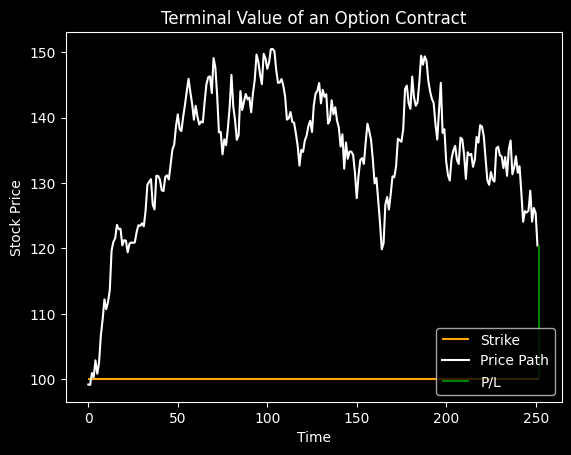

Premium at t=0: 14.231254785985819
P/L: 6.226809701738496
[ 99.18429254  99.11940289 100.94109065 100.28511386 102.88396409
 100.8319981  102.53936198 106.68872693 109.13221416 112.20335954
 110.69761632 111.77742009 113.66483565 119.68945057 120.9963341
 121.54524582 123.61246377 122.95584747 123.0051008  120.47349067
 121.26415726 121.1938291  119.40820746 120.71685604 120.92243683
 120.85593885 120.92824484 122.51660038 123.5541688  123.45069609
 123.84781063 123.3883276  125.75659892 129.73264957 130.19662585
 130.5993704  126.70712597 125.96055875 131.11048319 131.09752098
 130.52409724 128.91899028 128.77096498 130.94652849 131.18447682
 130.56117349 132.80157455 135.14382503 135.86851457 138.70283288
 140.51182478 138.30370599 137.95113707 140.10694975 141.95705449
 144.02679154 145.95094682 143.96494744 142.15677842 139.69293089
 141.81969791 140.14395834 138.96731628 139.41915132 139.27248214
 142.40889528 145.11587811 146.19834358 146.3246971  143.77602662
 149.1178351  147.6

In [42]:
gbm = GeometricBrownianMotion(100, 0.02, .3, 1/252, 1)
# 100 - initial underlying asset price
# 0 - underlying asset drift (mu)
# .3 - underlying asset volatility
# 1/252 - time steps (dt)
# 1 - time to maturity (annum)

# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(gbm.simulated_path, label='Price Path', color='white')
if max(gbm.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, gbm.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, gbm.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", black_scholes_call(100, 100, .3, .05, 1))
print("P/L:", max(gbm.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, .3, .05, 1))
print(gbm.simulated_path)

### How to Make Money using the Black-Scholes Model

Let $T$ be a trading strategy such that options are bought/sold when there is a theoretical discrepency between the model price and market maker quote.

$$\mathbb{E}T > 0 \implies \text{ Positive P/L Over Time}$$

In [15]:
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


### Computing the P/L Edge with Respect to the Model Dynamics

In [49]:
premium = 14.10 * 100
pls = []

for i in range(1000000):
    gbm = GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(gbm.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

np.float64(83.66985615550158)

### Simulating an Equity Curve Assuming Underlying Dynamics

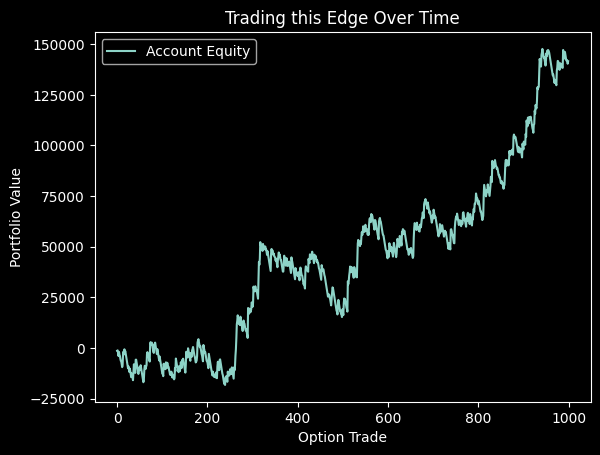

In [47]:
premium = 14.10 * 100
pls = []

for i in range(1000):
    gbm = GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(gbm.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

### Some Issues Trading Model Prices

- Non-stationarity in parameterization
- Volatility is not constant and lacks clustering heuristic
- Dynamics do not include jumps
- etc.